## Data Loading and Cleaning

In [1]:
import pandas as pd

file_path = r'c:\Users\91735\OneDrive\Desktop\analyst content\data\projects\Antartica_Global_Assignment\Performance_Analytics&Projections_for_Business_Development\Data\Data Assignment.xlsx'

# Read all sheets into a dictionary of DataFrames
dfs = pd.read_excel(file_path, sheet_name=None)

# Extracting each sheet into separate DataFrames
df_Raj = dfs['Raj']
df_Arya = dfs['Arya']
df_Ali = dfs['Ali']

#Null Values(Holidays)
columns_to_check = ['Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)']

# Creating a new dictionary to store the cleaned DataFrames
cleaned_dfs = {}

# Iterate over each sheet in the original dictionary and drop rows with missing values in the specified columns
for sheet_name, df in dfs.items():
    cleaned_dfs[sheet_name] = df.dropna(subset=columns_to_check)

df_Raj_cleaned = cleaned_dfs['Raj']
df_Arya_cleaned = cleaned_dfs['Arya']
df_Ali_cleaned = cleaned_dfs['Ali']

# Handling missing values in Other cols
df_Raj_cleaned.loc[:, 'Daily Team Review'] = df_Raj_cleaned['Daily Team Review'].ffill()
df_Raj_cleaned.loc[:, 'No. of Incomplete Leads'] = df_Raj_cleaned['No. of Incomplete Leads'].ffill()
cleaned_dfs['Raj']=df_Raj_cleaned


## Performance Consistency

In [2]:
cv_results = {}

for sheet_name, data in cleaned_dfs.items():
    if 'Leads' in data.columns:
        # Calculate the mean and standard deviation of daily leads
        mean_leads = data['Leads'].mean()
        std_dev_leads = data['Leads'].std()
        
        # Calculate CV
        cv = (std_dev_leads / mean_leads) * 100
        
        # Store the result in the dictionary
        cv_results[sheet_name] = cv

# Convert the results to a DataFrame for better readability
cv_df = pd.DataFrame(list(cv_results.items()), columns=['Associate', 'Coefficient of Variation'])
print(cv_df)


  Associate  Coefficient of Variation
0       Raj                 24.337176
1      Arya                 18.657174
2       Ali                 25.539110


## Insights:

### Arya's Consistency:
- **Most Consistent**: Arya has the lowest coefficient of variation (18.66%), indicating that her daily lead generation is the most consistent among the three associates.
- **Stable Performance**: Arya’s daily performance has less fluctuation relative to her average, suggesting a stable approach to lead generation.

### Raj's Consistency:
- **Moderately Consistent**: Raj has a coefficient of variation of 24.34%. This indicates that his performance is moderately consistent, with some variation in the number of leads generated each day.
- **Potential for Improvement**: While Raj's performance is fairly consistent, there is room to reduce variability and aim for a lower CV.

### Ali's Consistency:
- **Least Consistent**: Ali has the highest coefficient of variation (25.54%), suggesting that his daily lead generation is the most variable.
- **Inconsistent Performance**: Ali’s performance fluctuates more significantly compared to Arya and Raj. This could indicate inconsistencies in his work habits or external factors affecting his daily output.


In [3]:
high_performance_results = {}

for sheet_name, data in cleaned_dfs.items():
    
    # Determine the quantile threshold for high-performance days
    if sheet_name == 'Arya':
        quantile_threshold = 0.85  # Use 80th percentile for Arya( Arya's lead generation was relatively consistent and didn't have any exceptionally high days that stood out as being in the top 10%)
    else:
        quantile_threshold = 0.90  # Use 90th percentile for others
    
    high_performance_cutoff = data['Leads'].quantile(quantile_threshold)
    
    high_performance_days = data[data['Leads'] > high_performance_cutoff]
    
    avg_time_spent = high_performance_days['Time spent on LG (mins)'].mean()
    
    high_performance_results[sheet_name] = avg_time_spent

high_performance_df = pd.DataFrame(list(high_performance_results.items()), columns=['Associate', 'Avg Time Spent on High-Performance Days'])

print(high_performance_df)


  Associate  Avg Time Spent on High-Performance Days
0       Raj                               333.333333
1      Arya                               161.200000
2       Ali                               360.000000


In [4]:
avg_time_spent_on_all_days={}

for sheet_name, data in cleaned_dfs.items():
    avg_time_spent=data['Time spent on LG (mins)'].mean()
    avg_time_spent_on_all_days[sheet_name]=avg_time_spent

avg_time = pd.DataFrame(list(avg_time_spent_on_all_days.items()), columns=['Associate', 'Avg Time Spent on leads by Assosciate'])
print(avg_time)

  Associate  Avg Time Spent on leads by Assosciate
0       Raj                             258.170732
1      Arya                             135.829268
2       Ali                             225.243902


In [5]:
avg_time=avg_time.reset_index()
high_performance_df=high_performance_df.reset_index()
avg_time

,index,Associate,Avg Time Spent on leads by Assosciate
0,0,Raj,258.170732
1,1,Arya,135.829268
2,2,Ali,225.243902


In [6]:
df_merged = pd.merge(avg_time,high_performance_df, on='Associate')
df_merged.drop(columns=['index_x','index_y'])

,Associate,Avg Time Spent on leads by Assosciate,Avg Time Spent on High-Performance Days
0,Raj,258.170732,333.333333
1,Arya,135.829268,161.200000
2,Ali,225.243902,360.000000


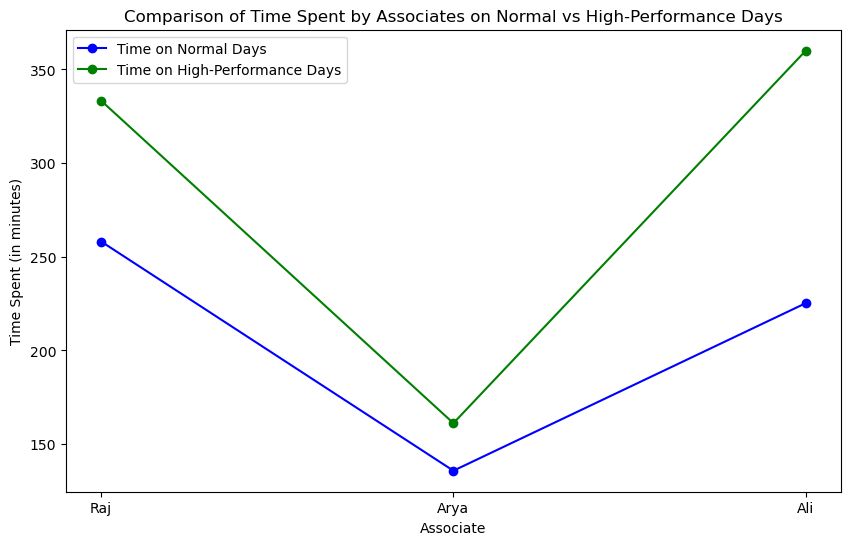

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the line for Avg Time Spent on leads by Associate (Normal Days)
plt.plot(df_merged['Associate'], df_merged['Avg Time Spent on leads by Assosciate'], 
         marker='o', linestyle='-', color='blue', label='Time on Normal Days')

plt.plot(df_merged['Associate'], df_merged['Avg Time Spent on High-Performance Days'], 
         marker='o', linestyle='-', color='green', label='Time on High-Performance Days')

plt.title('Comparison of Time Spent by Associates on Normal vs High-Performance Days')
plt.xlabel('Associate')
plt.ylabel('Time Spent (in minutes)')


plt.legend()
plt.grid(False)
plt.show()


### Comparative Insights

#### Raj
- **Overall Time Spent**: 258.17 minutes
- **Time on High-Performance Days**: 333.33 minutes
- **Insight**: Raj spends significantly more time on high-performance days compared to his average time spent. This suggests that Raj's most successful days are associated with a higher investment of time.

#### Arya
- **Overall Time Spent**: 135.83 minutes
- **Time on High-Performance Days**: 161.20 minutes
- **Insight**: Arya's time spent on high-performance days is notably higher than her overall average time spent. However, the increase is relatively modest compared to Raj and Ali. Despite this modest increase, Arya achieves high performance with a lower average time spent than her peers

#### Ali
- **Overall Time Spent**: 225.24 minutes
- **Time on High-Performance Days**: 360.00 minutes
- **Insight**: Ali’s time spent on high-performance days is the highest among the associates and also represents a substantial increase from his average time spent. This suggests a strong correlation between time spent and performance for Ali. More time dedicated to lead generation correlates with higher performance on his top days.

#### Conclusion
Avg Time spent on clients on high performance days is higher that avg time spent on clients for all three assosciates.


## Impact of Longer Lead Generation Time

#### First we will apply single linear model for identifying breakpoints and if that a single linear model isn't sufficient.


Analysis for Raj:



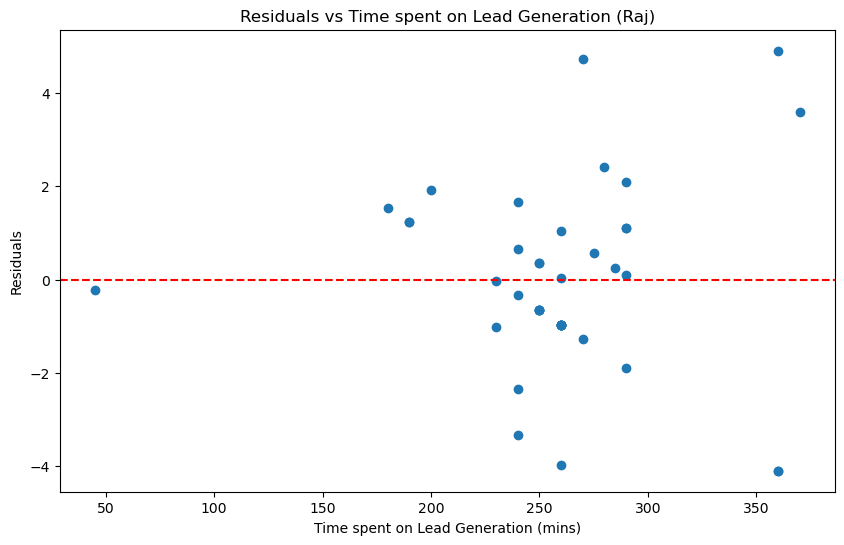


Analysis for Arya:



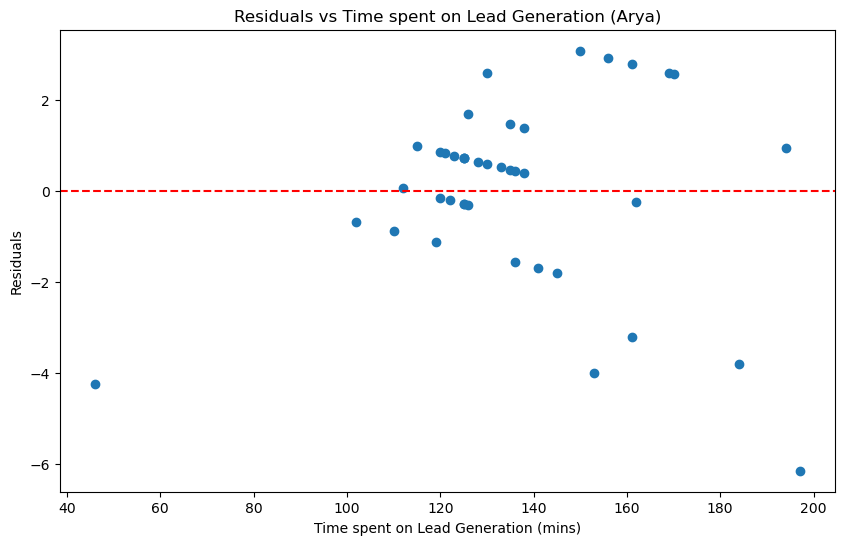


Analysis for Ali:



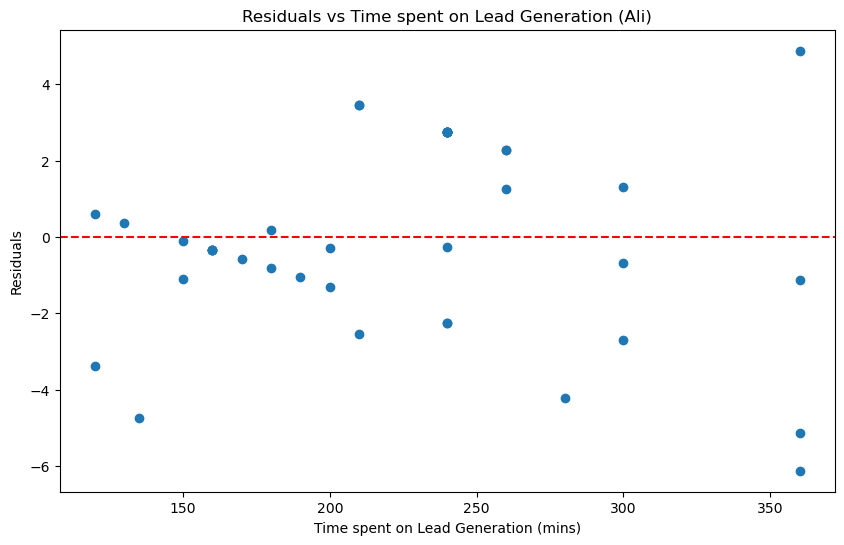

In [8]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

for associate, data in cleaned_dfs.items():
    print(f"\nAnalysis for {associate}:\n")
    
    X = data['Time spent on LG (mins)'].values.reshape(-1, 1)  # Independent variable
    y = data['Leads'].values  # Dependent variable

    # Fitting a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predicting the Leads for all values of time spent
    y_pred = model.predict(X)

    # Finding the Residuals
    residuals = y - y_pred

    # Visualizing the residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(X, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals vs Time spent on Lead Generation ({associate})')
    plt.xlabel('Time spent on Lead Generation (mins)')
    plt.ylabel('Residuals')
    plt.show()



## Breakpoint Analysis

As we can see residuals consistently deviate from zero suggesting the relationship between time spent and leads generated is changing a lot so simple linear model will not be helpful in finding threshold time. So now we will use Piecewise Linear fit model for identifying the breakpoint.

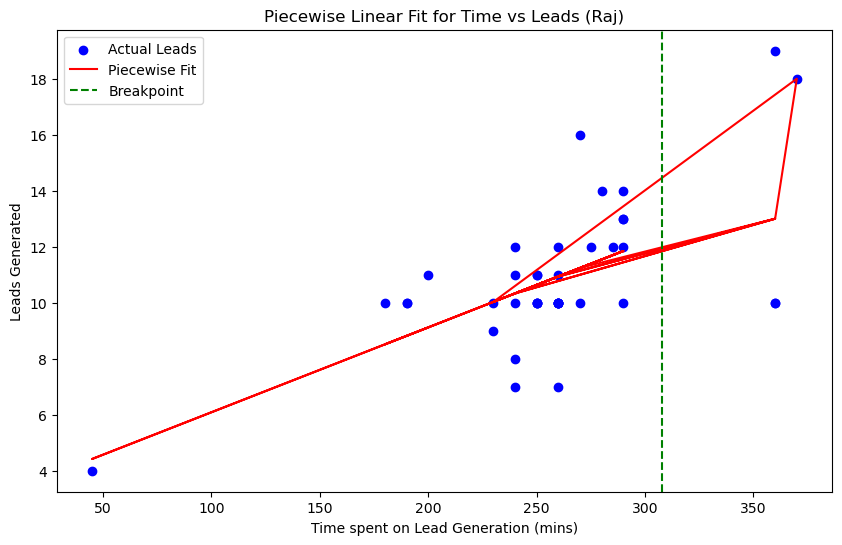

Optimal Time Threshold for Raj: 307.86 minutes


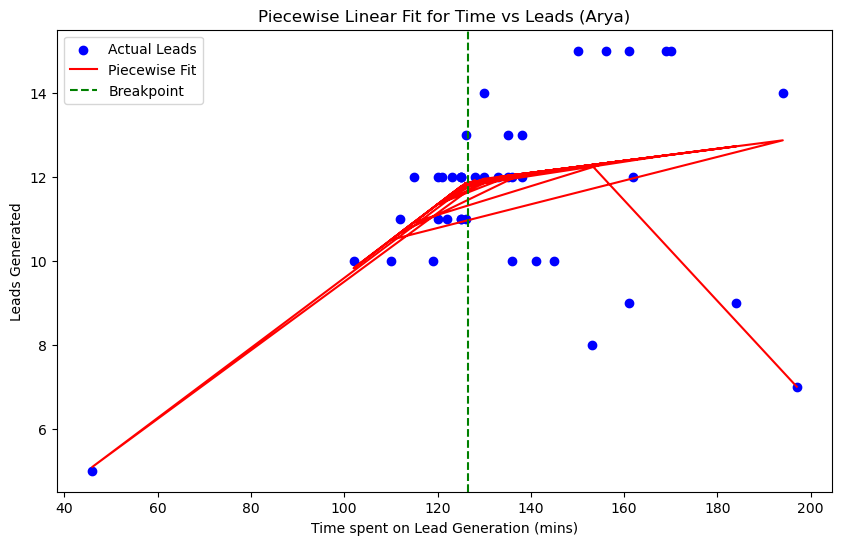

Optimal Time Threshold for Arya: 126.62 minutes


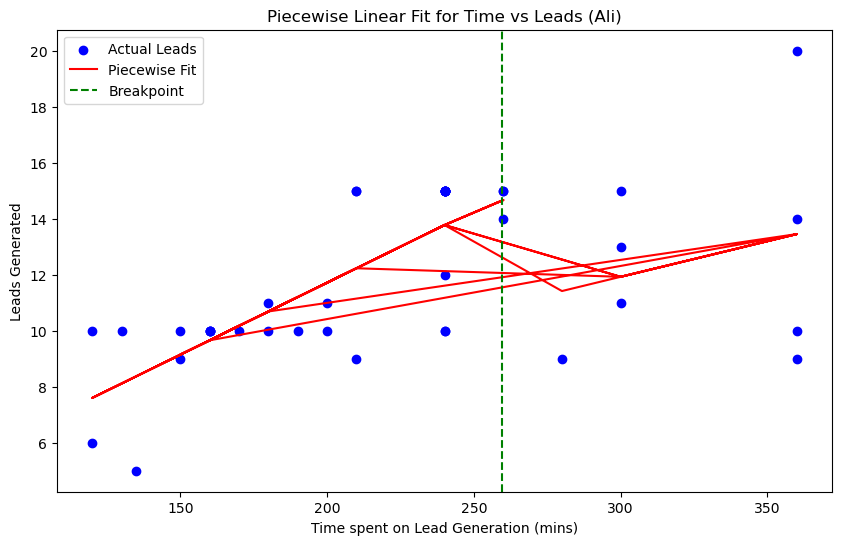

Optimal Time Threshold for Ali: 259.62 minutes


In [9]:
threshold_dfd={}
for associate, data in cleaned_dfs.items():
    i=0
    
    X = data['Time spent on LG (mins)'].values.reshape(-1, 1)  # Independent variable
    y = data['Leads'].values  # Dependent variable
    try:
        import pwlf
        # Fitting the piecewise linear model
        pwlf_model = pwlf.PiecewiseLinFit(X.flatten(), y)
        breaks = pwlf_model.fit(3)  # 3 segments

        # Predicting the leads based on the model
        y_pwlf_pred = pwlf_model.predict(X.flatten())

        # Visualizing the piecewise fit
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue', label='Actual Leads')
        plt.plot(X, y_pwlf_pred, color='red', label='Piecewise Fit')
        plt.axvline(x=breaks[1], color='green', linestyle='--', label='Breakpoint')
        plt.title(f'Piecewise Linear Fit for Time vs Leads ({associate})')
        plt.xlabel('Time spent on Lead Generation (mins)')
        plt.ylabel('Leads Generated')
        plt.legend()
        plt.show()
        threshold_dfd[associate]=breaks[1]
        i=i+1
        print(f"Optimal Time Threshold for {associate}: {breaks[1]:.2f} minutes")

    except Exception as e:
        print(f"Piecewise analysis for {associate} failed: {e}")

threshold_df = pd.DataFrame(list(threshold_dfd.items()), columns=['Associate', 'Optimal Time Threshold'])


In [10]:
threshold_df

,Associate,Optimal Time Threshold
0,Raj,307.857010
1,Arya,126.624361
2,Ali,259.617079


## Insights

**Threshold Analysis:** The optimal time thresholds identified for each associate (Raj, Arya, Ali) suggest that beyond these times, there could be significant increases in the number of leads generated. For instance:

Raj: 318.38 minutes
Arya: 126.62 minutes
Ali: 259.66 minutes

**Implication:** The threshold values imply that each associate has a different optimal time for maximizing leads. Arya’s threshold is significantly lower, which may indicate higher efficiency or a different approach to lead generation compared to Raj and Ali.

In summary, using pwlf with three segments has helped in identifying where significant changes in lead generation occur, allowing for targeted adjustments in time management for lead generation.

## Comparative Day Analysis

####  Function to Calculate Average Leads

In [11]:
def calculate_average_leads(associate_df):
    # First, create a column to distinguish weekdays from weekends
    associate_df.loc[:, 'Weekday/Weekend'] = associate_df['Day'].apply(
        lambda x: 'Weekend' if x in ['Fri'] else 'Weekday'
    )
    
    # Group by the new column and calculate the average number of leads
    average_leads = associate_df.groupby('Weekday/Weekend')['Leads'].mean().reset_index()
    
    return average_leads

#### Apply the Function to Each Associate

In [12]:
for associate, df in cleaned_dfs.items():
    print(f"Average Leads for {associate}:")
    avg_leads = calculate_average_leads(df)
    print(avg_leads)
    print("\n")

Average Leads for Raj:
  Weekday/Weekend     Leads
0         Weekday  10.69697
1         Weekend  11.75000


Average Leads for Arya:
  Weekday/Weekend     Leads
0         Weekday  11.69697
1         Weekend  11.00000


Average Leads for Ali:
  Weekday/Weekend      Leads
0         Weekday  11.848485
1         Weekend  12.125000




C:\Users\91735\AppData\Local\Temp\ipykernel_14180\52308058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associate_df.loc[:, 'Weekday/Weekend'] = associate_df['Day'].apply(
C:\Users\91735\AppData\Local\Temp\ipykernel_14180\52308058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associate_df.loc[:, 'Weekday/Weekend'] = associate_df['Day'].apply(
C:\Users\91735\AppData\Local\Temp\ipykernel_14180\52308058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

## Insight

**Weekday vs. Weekend Performance:**
- Raj and Ali perform better on weekends, while Arya performs slightly better on weekdays.
The differences in performance are not very large, but they do indicate slight preferences or differences in productivity depending on the day of the week.